# HW3

**Deadline:** 24.11.2024 23:59 (GMT+5)

## Task 3.1 (2 points)

Let $x_1, \dots, x_n \sim U[0,1]$. Sort them in the nondecreasing order:

$$
    x_{(1)} \leqslant x_{(2)} \leqslant \ldots \leqslant x_{(k)} \leqslant\ldots\leqslant x_{(n)}.
$$

The $k$-th element $x_{(k)}$ in this sequence is called **$k$-th order statistics**. Show that $x_{(k)} \sim \mathrm{Beta}(k, n+1 -k)$. Do it in two ways:

* **experimentally**: generate a random matrix of shape $N \times n$ (try $N = 1000, 10000, 100000$), calculate $k$-th order statistics for each row and plot historgram of these values along with pdf of beta distribution. (**1 point**)

* **theoretically**: present a mathematical proof of this statement (**1 point**)

```{warning}
To get full points for the experimental part you should avoid pythonic loops when generating random matrix. The only place where `for` loop is allowed is iterating over several values of $N$.
```

### YOUR SOLUTION HERE

Your historgram for a paticular value of $N$ should look like this:

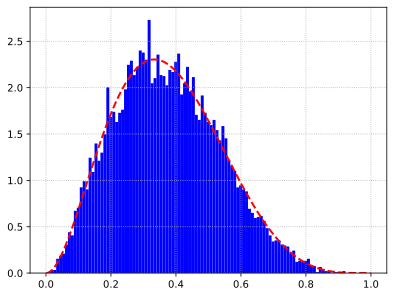

In [ ]:
from scipy.stats import beta, gamma
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

def beta_hist(a, b, N=10000):
    xs = np.linspace(0.001, 0.999, num=1000)
    plt.hist(beta(a, b).rvs(size=N), bins=100, color='b', density=True)
    plt.plot(xs, beta(a, b).pdf(xs), c='r', lw=2, ls="--")
    plt.grid(ls=":")

beta_hist(3, 5)

In [ ]:
def plott_beta_hist(kth_order_stat, a, b):
    x = np.linspace(0.001, 0.999, num=1000)
    plt.hist(kth_order_stat, bins=50, density=True, color='b', label="Histogram")

    beta_pdf = beta.pdf(x, a, b)
    plt.plot(x, beta_pdf, c='r', lw=1, ls="--", label=f"Beta({a}, {b}) PDF")

    plt.legend()
    plt.show()

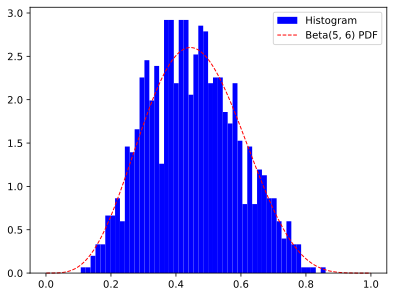

In [ ]:
N = 1000
n = 10
k = 5

a = k
b = n - k + 1

random_matrix = np.random.uniform(0, 1, (N, n))
sorted_matrix = np.sort(random_matrix, axis=1)
kth_order_stat = sorted_matrix[:, k-1]


plott_beta_hist(kth_order_stat, a, b)

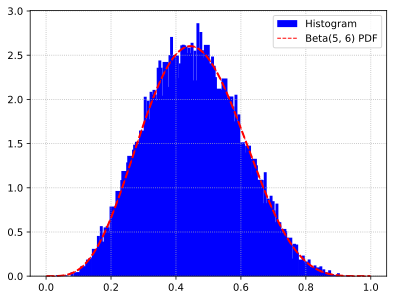

In [ ]:
N = 10000
n = 10
k = 5

a = k
b = n - k + 1
beta_hist(a, b, N)

random_matrix = np.random.uniform(0, 1, (N, n))
sorted_matrix = np.sort(random_matrix, axis=1)
kth_order_stat = sorted_matrix[:, k-1]


plott_beta_hist(kth_order_stat, a, b)

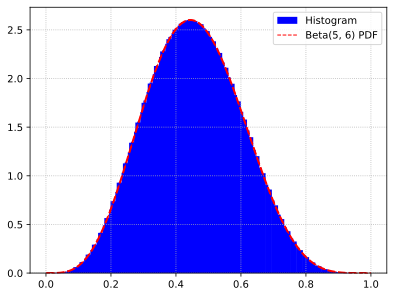

In [ ]:
N = 100000
n = 10
k = 5

a = k
b = n - k + 1
beta_hist(a, b, N)

random_matrix = np.random.uniform(0, 1, (N, n))
sorted_matrix = np.sort(random_matrix, axis=1)
kth_order_stat = sorted_matrix[:, k-1]


plott_beta_hist(kth_order_stat, a, b)

## theoretically: present a mathematical proof of this statement (1 point)
$
   X_{(k)} \sim \text{Beta}(k, n-k+1)
$

1) $ Г(n) = (n - 1)! $ \\
2) $ B(a, b) =  \frac{Г(a) \times Г(b)}{Г(a + b)} $

$ \text{Beta}(k, n-k+1) $ = $ \frac{Г(k) \times Г(n-k+1)}{Г(n+1)} $ = $ \frac{(n-1)!(n-k)!}{n!} $ = $ nC(n - 1)(k - 1) $

The density of the k-th order statistic is: \\
$
   f_{X_{(k)}}(x) = nC(n-1, k-1) x^{k-1}(1-x)^{n-k}
$

The joint density of $ X_{(1)}, X_{(2)}, \ldots, X_{(n)} $ is proportional to $ n! $ times the product of the marginal PDFs for uniform samples, with constraints $ 0 \leq X_{(1)} \leq X_{(2)} \leq \ldots \leq X_{(n)} \leq 1 $.

By integrating over all other variables except $ X_{(k)} $, the marginal density simplifies to:
$
f_{X_{(k)}}(x) = \frac{n!}{(k-1)!(n-k)!} x^{k-1}(1-x)^{n-k}
$

This matches the form of the Beta distribution:
$
f_{X_{(k)}}(x) = \frac{x^{k-1}(1-x)^{n-k}}{B(k, n+1-k)},
$
where $ B(k, n+1-k) $ is the Beta function for normalization.

\\
For $U_{(k)}$ to be between $u$ and $u + du$, it is necessary that exactly $k - 1$ elements of the sample are smaller than $u$, and that at least one is between $u$ and $u + du$. The probability that more than one is in this latter interval is already $O(du^2)$, so we calculate the probability that exactly $k - 1$, 1, and $n - k$ observations fall in the intervals $(0, u)$, $(u, u + du)$, and $(u + du, 1)$, respectively.


## Task 3.2 (2 points)

* Find KL divergence between $p\sim \mathrm{Geom}(s)$ and $q\sim \mathrm{Geom}(t)$, $0 < s, t < 1$. Is $\mathbb{KL}(p, q) = 0$ when $s = t$? Does equality $\mathbb{KL}(p, q) = \mathbb{KL}(q, p)$ hold? (**1.5 points**)

* Plot the graphs of $\mathbb{KL}(p, q)$ as functions of $s$ for several fixed values of $t$. (**0.5 points**)

### YOUR SOLUTION HERE

### 1) For $ P \sim \text{Geom}(s) $ and $Q \sim \text{Geom}(t)$, the KL divergence is defined as:
\
$
KL(P \| Q) = \sum_{k=0}^\infty P(k) \log \frac{P(k)}{Q(k)}
$

Substituting the geometric PMFs:
\
$
\text{KL}(P \| Q) = \sum_{k=0}^\infty (1-s)^k s \log \frac{(1-s)^k s}{(1-t)^k t}
$
\
Simplify:
\
$
\text{KL}(P \| Q) = \sum_{k=0}^\infty (1-s)^k s \left[ \log \frac{s}{t} + k \log \frac{1-s}{1-t} \right]
$
\
Separate the terms:
\
$
\text{KL}(P \| Q) = \log \frac{s}{t} \sum_{k=0}^\infty (1-s)^k s + \log \frac{1-s}{1-t} \sum_{k=0}^\infty k (1-s)^k s
$
\
Use geometric series:
1. For the first sum:
\
$
\sum_{k=0}^\infty (1-s)^k s = \frac{s}{1 - 1 + s} = 1
$

2. For the second sum:
\
$
\sum_{k=0}^\infty k (1-s)^k s = s \frac{1 - s}{(1 - 1 + s) ^ 2} = \frac{1-s}{s}
$
\
Substitute back:
\
$
\text{KL}(P \| Q) = \log \frac{s}{t} + \frac{1-s}{s} \log \frac{1-s}{1-t}
$

### 2) When  s = t
$
\text{KL}(P \| Q) = \log \frac{s}{s} + \frac{1-s}{s} \log \frac{1-s}{1-s}\\
\text{KL}(P \| Q) = \log1 + \frac{1-s}{s} \log1\\
\text{KL}(P \| Q) = 0 + \frac{1-s}{s} 0\\
\text{KL}(P \| Q) = 0\\
$
### 3) Does equality $ KL(P \| Q) =  KL(Q \| P) $ hold?
$ KL(P \| Q) =  KL(Q \| P) $ only if $ KL(P \| Q) = 0 $

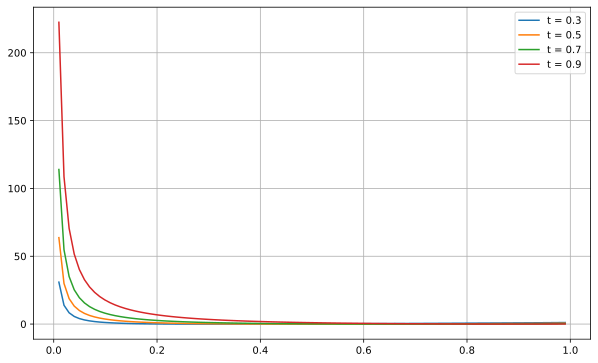

In [ ]:
def kl_divergence_geom(s, t):
    if s == 0 or t == 0 or s == 1 or t == 1:
        return np.inf
    term1 = np.log(s / t)
    term2 = ((1 - s) / s) * np.log((1 - s) / (1 - t))
    return term1 + term2

s_values = np.linspace(0.01, 0.99, 100)
t_values = [0.3, 0.5, 0.7, 0.9]

kl_results = {}
for t in t_values:
    kl_results[t] = [kl_divergence_geom(s, t) for s in s_values]

plt.figure(figsize=(10, 6))
for t, kl in kl_results.items():
    plt.plot(s_values, kl, label=f't = {t}')

plt.legend()
plt.grid(True)
plt.show()


## Task 3.3 (2 points)

For a one-dimensional gaussian $\xi \sim \mathcal N(\mu, \sigma^2)$ there are well-known rules of one, two and three sigmas:

* one-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant \sigma) = \Phi(1) - \Phi(-1) \approx 0.6827$
* two-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant 2\sigma) = \Phi(2) - \Phi(-2) \approx 0.9545$
* three-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant 3\sigma) = \Phi(3) - \Phi(-3) \approx 0.9973$

```{figure} https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/201202/20120208160239-1_0.jpg?itok=1X1a_HCs
:align: center
```

In [ ]:
from scipy.stats import norm

norm.cdf(1) - norm.cdf(-1), norm.cdf(2) - norm.cdf(-2), norm.cdf(3) - norm.cdf(-3)

(np.float64(0.6826894921370859),
 np.float64(0.9544997361036416),
 np.float64(0.9973002039367398))

Compute analagous values for a 2-d gaussian distribution $\boldsymbol \xi \sim \mathcal N(\boldsymbol 0, \boldsymbol I_2)$. Namely, find $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 1)$, $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 2)$, $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 3)$

* analytically (**1 point**)
* numerically, using `scipy` or Monte Carlo methods (**1 point**)

### YOUR SOLUTION HERE

The magnitude of a 2-dimensional Gaussian random vector $ \xi \sim \mathcal{N}(0, I_2) $ is given by $ \|\xi\|_2 = \sqrt{\xi_1^2 + \xi_2^2} $, where $ \xi_1 $ and $ \xi_2 $ are independent standard normal random variables.

The squared magnitude $ \|\xi\|_2^2 = \xi_1^2 + \xi_2^2 $ follows a Chi-squared distribution with 2 degrees of freedom $ \chi^2_2 $.

The cumulative distribution function (CDF) of $ \|\xi\|_2 $ (the Rayleigh distribution) is derived as follows:
$
P(\|\xi\|_2 \leq k) = P(\sqrt{\xi_1^2 + \xi_2^2} \leq k) = P(\xi_1^2 + \xi_2^2 \leq k^2).
$
Since $ \xi_1^2 + \xi_2^2 \sim \chi^2_2 $, the CDF of $ \chi^2_2 $ is:
$
P(\|\xi\|_2^2 \leq k^2) = 1 - e^{-\frac{k^2}{2}}.
$
Thus, the probability is:
$
P(\|\xi\|_2 \leq k) = 1 - e^{-\frac{k^2}{2}}.
$

Substituting values of k:

1. For k = 1:
$
P(|\xi\|_2 \leq 1) = 1 - e^{-\frac{1^2}{2}} = 1 - e^{-0.5} \approx 0.3935.
$

2. For k = 2:
$
P(|\xi\|_2 \leq 2) = 1 - e^{-\frac{2^2}{2}} = 1 - e^{-2} \approx 0.8647.
$

3. For k = 3 :
$
P(|\xi\|_2 \leq 3) = 1 - e^{-\frac{3^2}{2}} = 1 - e^{-4.5} \approx 0.9889.
$

In [ ]:
def monte_carlo(k, n=10**6):
    samples = np.random.normal(0, 1, (n, 2))
    norms = np.linalg.norm(samples, axis=1)
    return np.mean(norms <= k)

k_values = [1, 2, 3]
monte_carlo_results = [monte_carlo(k) for k in k_values]
monte_carlo_results


[0.393769, 0.86433, 0.989083]

## Task 3.4 (1 point)


Let $X_1, \ldots, X_n$ is an i.i.d. sample form $U[0, 2\theta]$. The parameter $\theta$ can be estimated as
$\widehat\theta = \overline X_n$ (sample average) or $\tilde\theta = \mathrm{med}(X_1, \ldots, X_n)$ (sample median). According to [ML Handbook](https://education.yandex.ru/handbook/ml/article/parametricheskie-ocenki#svojstva-parametricheskih-ocenok), both estimations are unbiased, and $\mathbb V \widehat\theta = \frac{\theta^2}{3n}$, $\mathbb V \tilde\theta = \frac{\theta^2}{n+3}$. Hence, due to the central limit theorem

$$
    \widehat\theta \approx \mathcal N\Big(\theta, \frac{\theta^2}{3n}\Big), \quad
    \tilde\theta \approx \mathcal N\Big(\theta, \frac{\theta^2}{n+3}\Big), \quad n \gg 1.
$$

Plot two histograms on the same plot verifying this theoretical statements. Add two dashed lines for gaussians as it done {ref}`here <CLT>`. Try different values of $n$: $100$, $1000$, $10^4$, $10^5$.